# Gradient boosting benchmarking

In [1]:
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import misc

Load the data as `DataFrame`

In [2]:
# Read the benchmark data
data_skl = misc.load_benchmark_data('results/skl_random.pk')
data_xgb = misc.load_benchmark_data('results/xgboost_random.pk')
data_lgb = misc.load_benchmark_data('results/lightgbm_random.pk', True)

# Group the data in a single list
data_bench = [data_skl, data_xgb, data_lgb]

## Average fitting time analysis

### Data pre-processing

From the different dataset, select only the the average time column and the variables.

In [3]:
# Define which columns need to be selected
col_to_select = ['avg_fit_time','num_samples', 'num_features', 'max_depth', 'n_estimators']
# Select the columns
for idx_bench in range(len(data_bench)):
    data_bench[idx_bench] = data_bench[idx_bench].loc[:, col_to_select]
# Rename the column of the time
bench_name = ['sklearn', 'xgboost', 'lightgbm']
data_bench[0] = data_bench[0].rename(columns = {'avg_fit_time': bench_name[0]})
data_bench[1] = data_bench[1].rename(columns = {'avg_fit_time': bench_name[1]})
data_bench[2] = data_bench[2].rename(columns = {'avg_fit_time': bench_name[2]})

Merge all the `DataFrame` in a single one.

In [4]:
# The name of the column to use for the merging
key_merging = ['num_samples', 'num_features', 'max_depth', 'n_estimators']
# Merge the two first bench - keep only the intersection
df_bench = pd.merge(data_bench[0], data_bench[1], on=key_merging, how='inner')
df_bench = pd.merge(df_bench, data_bench[2], on=key_merging, how='inner')

### Grouping the data and plots

We need to group the data using the four previous variable of interest for making clean plots.

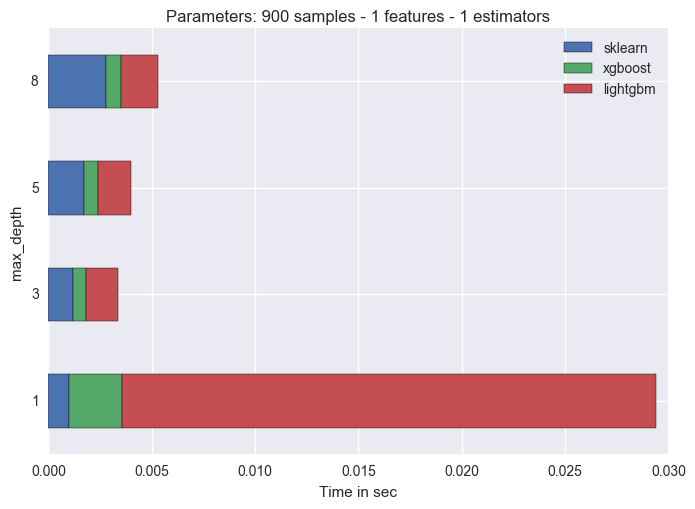

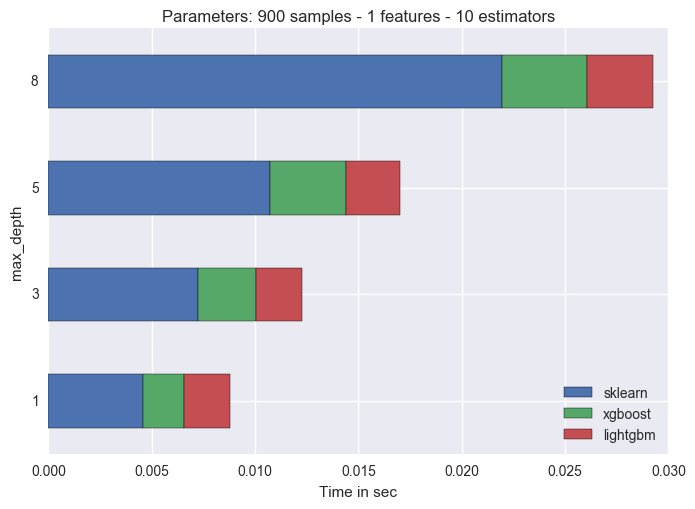

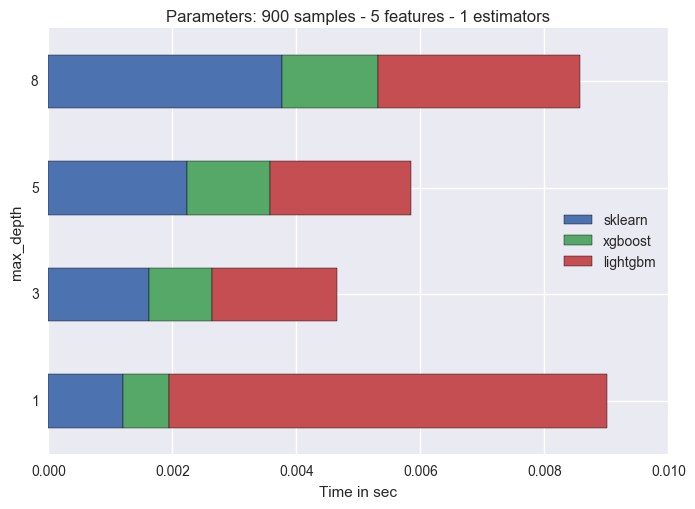

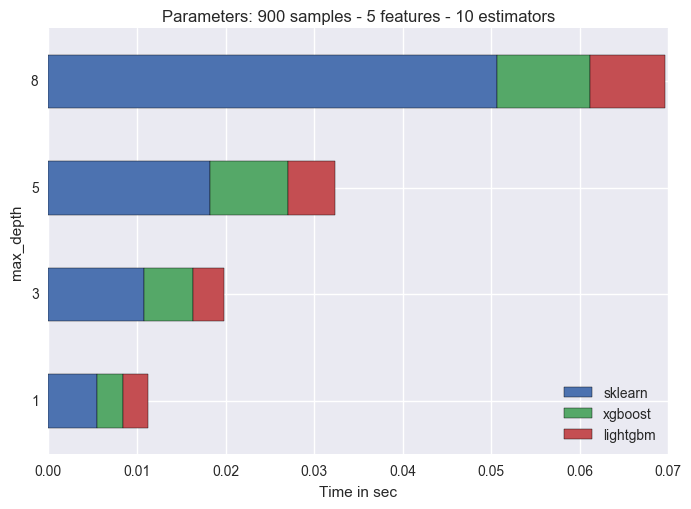

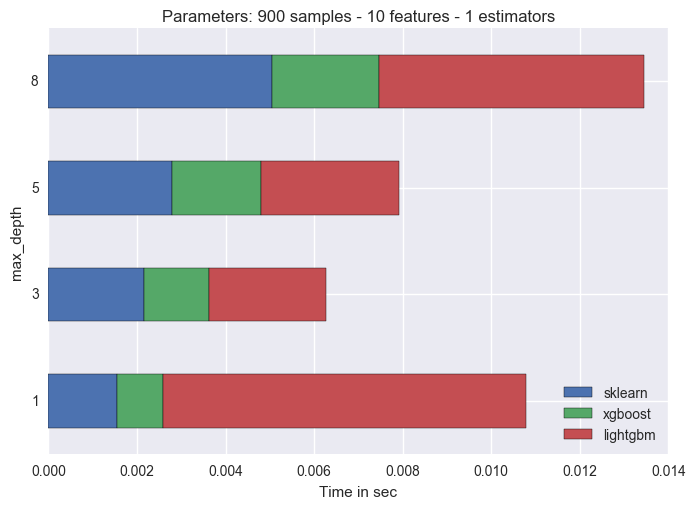

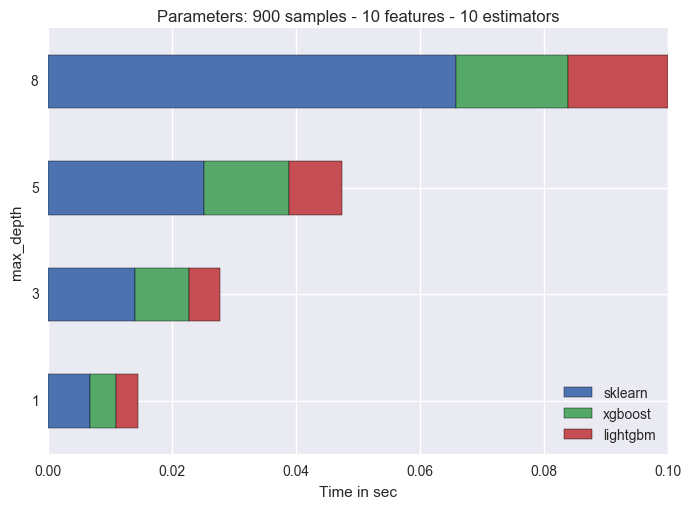

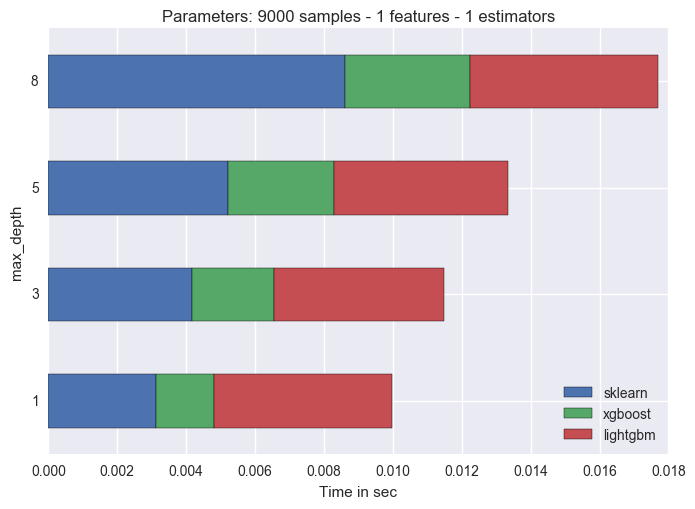

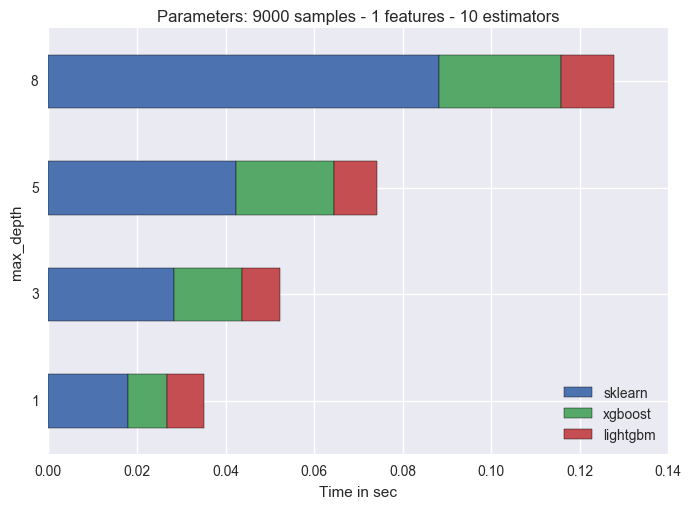

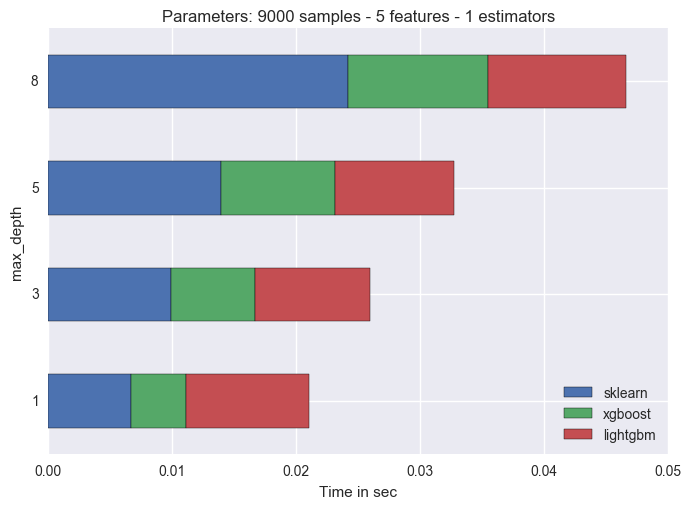

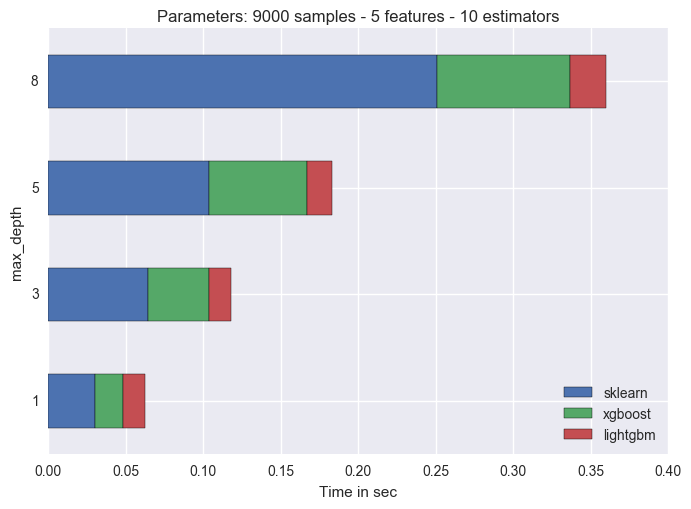

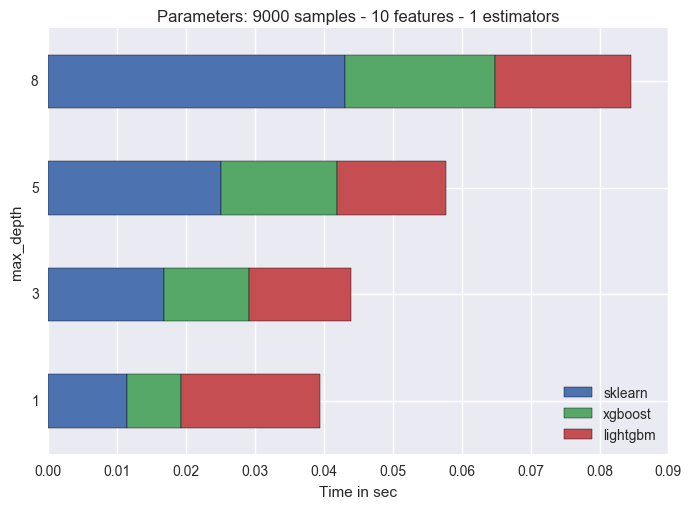

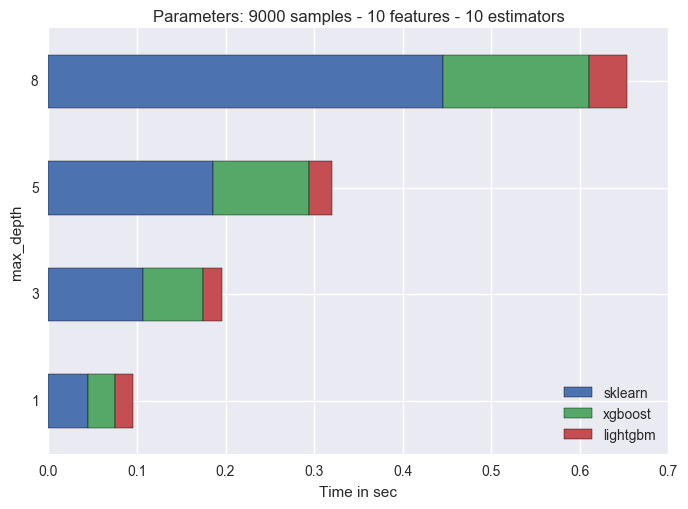

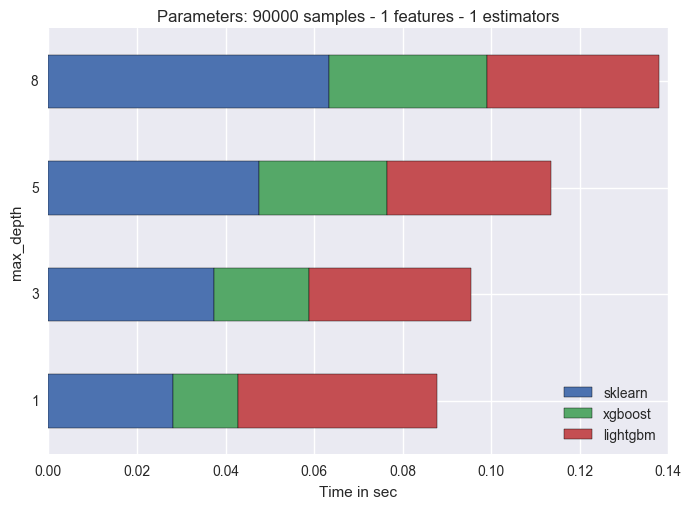

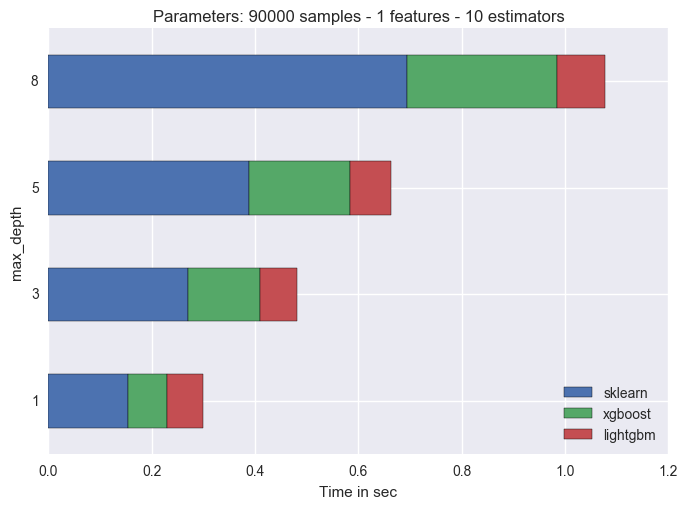

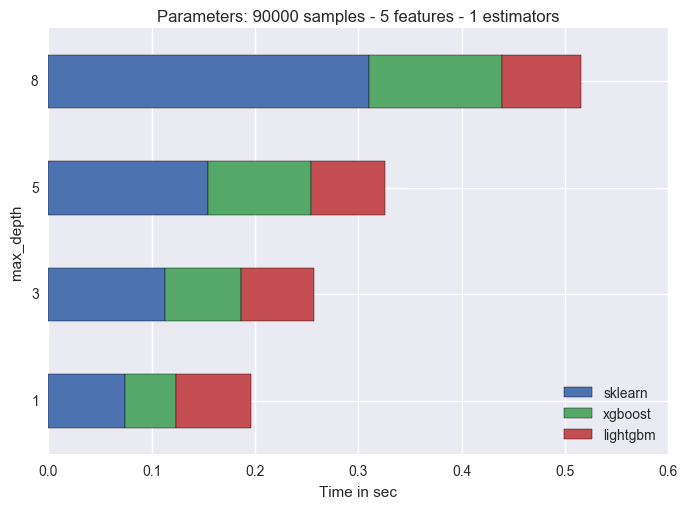

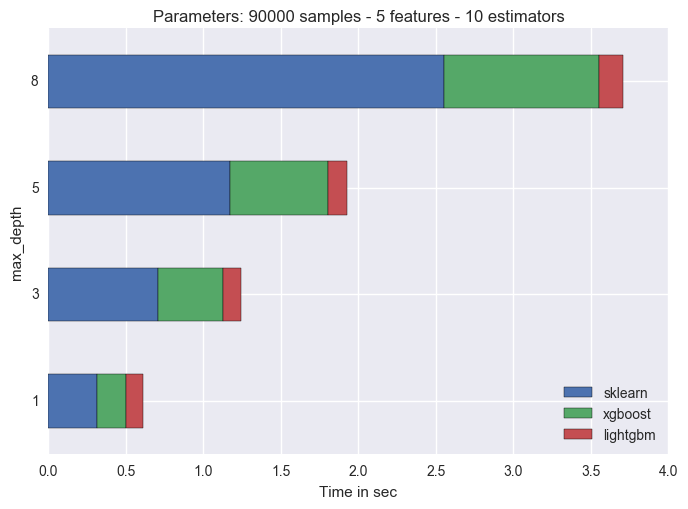

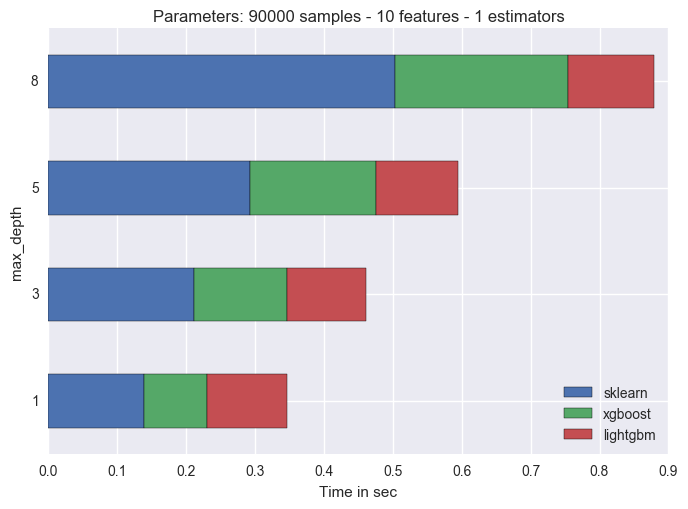

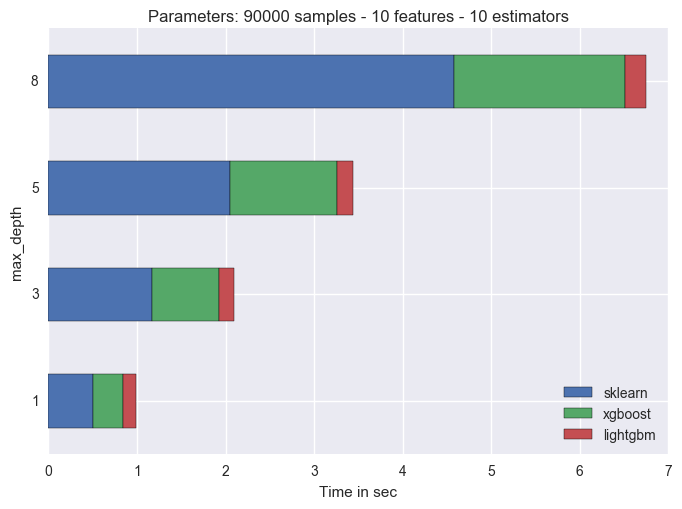

In [5]:
grouped_num_samples = df_bench.groupby('num_samples')
for ns, gs in grouped_num_samples:
    grouped_num_features = gs.groupby('num_features')
    for nf, gf in grouped_num_features:
        grouped_num_estimators = gf.groupby('n_estimators')
        for ne, ge in grouped_num_estimators:
            #grouped_max_depth = ge.groupby('max_depth')
            #for nd, gd in grouped_max_depth
            # Set a new index as the max depth
            df = ge.set_index('max_depth') 
            df[bench_name].plot.barh(stacked=True)
            plt.xlabel('Time in sec')
            plt.title('Parameters: {} samples - {} features - {} estimators'.format(ns, nf, ne))

# Dirty stuff - don't look at it

Sort the `DataFrame` just in case

In [82]:
grouped = data_skl.groupby('max_depth')

for name, group in grouped:
    print(name)
    print(group)

1
    avg_data_time  avg_fit_time  avg_score  max_depth  n_estimators  \
0    86399.999991      0.001001     0.5800          1             1   
1    86399.999994      0.001209     0.4600          1             1   
2    86399.999991      0.001548     0.4800          1             1   
3    86399.999994      0.003120     0.4870          1             1   
4    86399.999994      0.006652     0.4620          1             1   
5    86399.999994      0.011411     0.5340          1             1   
6    86399.999994      0.028072     0.4928          1             1   
7    86399.999991      0.073840     0.5017          1             1   
8    86399.999993      0.138284     0.4992          1             1   
9    86399.999994      0.004577     0.5900          1            10   
10   86399.999994      0.005475     0.4700          1            10   
11   86399.999993      0.006741     0.4400          1            10   
12   86399.999994      0.017911     0.4870          1            10   
13  

Create plenty of `DataFrame` by selecting samples by criterion

In [33]:
# Group all the DataFrame together
data_bench = [data_skl, data_xgb, data_lgb]

To later split/group the graph, we can find the set of parameters used

In [63]:
# Find the unique parameters
conf_num_samples = data_bench[0].num_samples.unique()
conf_num_features = data_bench[0].num_features.unique()
conf_max_depth = data_bench[0].max_depth.unique()
conf_n_estimators = data_bench[0].n_estimators.unique()

print('The number of samples tested are: {}'.format(conf_num_samples))
print('The number of features tested are: {}'.format(conf_num_features))
print('The maximum depth tested are: {}'.format(conf_max_depth))
print('The number of estimators tested are: {}'.format(conf_n_estimators))

The number of samples tested are: [  900  9000 90000]
The number of features tested are: [ 1  5 10]
The maximum depth tested are: [1 3 5 8]
The number of estimators tested are: [ 1 10]


### Extract the average time information

We extract the average time for the fitting for the different methods and put them in a DataFrame.
We keep also the different parameters.

In [70]:
avg_fit_time = np.zeros((data_skl.shape[0], 3))
for i in range(data_skl.shape[0]):
    # We need to get the configuration of interest
    num_samples = data_bench[0].loc[i, 'num_samples']
    num_features = data_bench[0].loc[i, 'num_features']
    max_depth = data_bench[0].loc[i, 'max_depth']
    n_estimators = data_bench[0].loc[i, 'n_estimators']
    
    # Build a list with all those variables
    col_name = ['num_samples', 'num_features', 'max_depth', 'n_estimators']
    col_val = [num_samples, num_features, max_depth, n_estimators]
    
    # Build the string for the query
    query_str = ''
    for var in range(len(col_name)):
        query_str += ' {} == {} &'.format(col_name[var], col_val[var])
    # Remove teh last &
    query_str = query_str[:-1]
    
    # Make the query
    col_to_select = ['avg_fit_time','num_samples', 'num_features', 'max_depth', 'n_estimators']
    for j in range(len(data_bench)):
        avg_fit_time[i, j] = data_bench[j].query(query_str).loc[:, col_to_select]

# Create a DataFrame with the time information
avg_fit_time_df = pd.DataFrame(avg_fit_time, columns=['sklearn', 'xgboost', 'lightgbm'])

SyntaxError: invalid syntax (<ipython-input-70-32f1b7e0f9b1>, line 21)

In [76]:
print(data_bench[0].sort_values(col_name))

    avg_data_time  avg_fit_time  avg_score  max_depth  n_estimators  \
0    86399.999991      0.001001     0.5800          1             1   
9    86399.999994      0.004577     0.5900          1            10   
18   86399.999994      0.001194     0.5900          3             1   
27   86399.999994      0.007245     0.6000          3            10   
36   86399.999994      0.001723     0.6000          5             1   
45   86399.999994      0.010730     0.5600          5            10   
54   86399.999994      0.002799     0.5800          8             1   
63   86399.999993      0.021947     0.5000          8            10   
1    86399.999994      0.001209     0.4600          1             1   
10   86399.999994      0.005475     0.4700          1            10   
19   86399.999994      0.001621     0.4300          3             1   
28   86399.999993      0.010778     0.4900          3            10   
37   86399.999995      0.002230     0.4200          5             1   
46   8

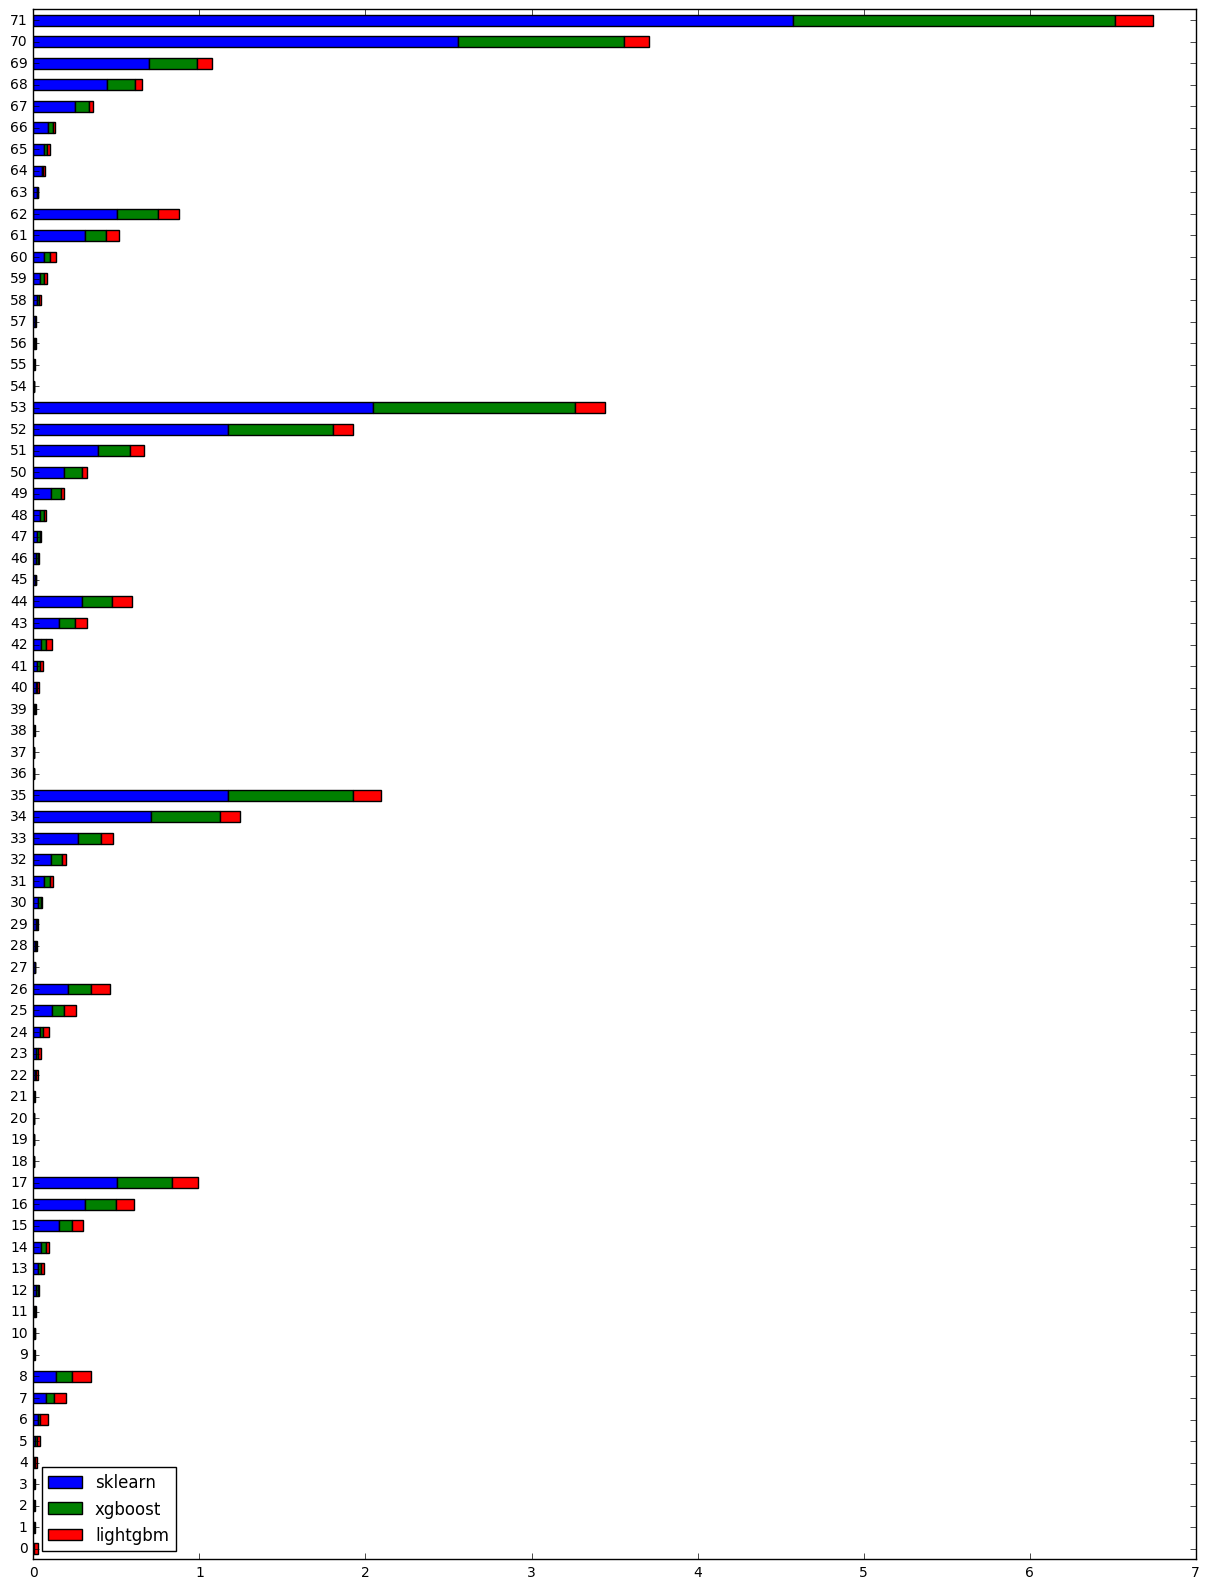

In [53]:
# Make an horizontal plot of the different time
avg_fit_time_df.plot.barh(stacked=True, figsize=(15, 20))